# ESTA ANÁLISE TRATA,
Da exploração, limpeza e tratamento de dados do dataset público: "Hotel Booking", tem como finalidade demonstrar técnicas utilizadas e e visualizações possíveis a fim de compor portfólio de Análista de Dados.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [10]:
df = pd.read_csv('hotel_booking.csv')

# ANÁLISE EXPLORATÓRIA E LIMPEZA DE DADOS

In [11]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [12]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,Transient,151.20,0,2,Check-Out,2017-09-07,Ariana Michael,Ariana_M@xfinity.com,422-804-6403,************4482


In [13]:
df.shape

(119390, 36)

In [14]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [15]:
df.columns = ['hotel', 'cancelamento', 'tempo de espera', 'chegada ano',
       'chegada mês', 'semana de chegada',
       'dia de chegada', 'estadias final de semana',
       'estadias na semana', 'adultos', 'crianças', 'bebês', 'refeição',
       'país', 'segmento', 'canal de distribuição',
       'hóspede recorrente', 'cancelamento prévio',
       'reserva não cancelada', 'acomodação',
       'quarto', 'alteração de reserva', 'tipo de depósito', 'agente',
       'empresa', 'dias na lista de espera', 'consumidor', 'adr',
       'vagas de estacionamento', 'solicitações especiais',
       'status de reserva', 'data de status da reserva', 'nome', 'email',
       'telefone', 'cartão de crédito']

In [22]:
df.drop(['nome', 'email',
       'telefone', 'cartão de crédito'], axis= 1, inplace= True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   hotel                      119390 non-null  object        
 1   cancelamento               119390 non-null  int64         
 2   tempo de espera            119390 non-null  int64         
 3   chegada ano                119390 non-null  int64         
 4   chegada mês                119390 non-null  object        
 5   semana de chegada          119390 non-null  int64         
 6   dia de chegada             119390 non-null  int64         
 7   estadias final de semana   119390 non-null  int64         
 8   estadias na semana         119390 non-null  int64         
 9   adultos                    119390 non-null  int64         
 10  crianças                   119386 non-null  float64       
 11  bebês                      119390 non-null  int64   

In [24]:
 df.tail()

,hotel,cancelamento,tempo de espera,chegada ano,chegada mês,semana de chegada,dia de chegada,estadias final de semana,estadias na semana,adultos,...,tipo de depósito,agente,empresa,dias na lista de espera,consumidor,adr,vagas de estacionamento,solicitações especiais,status de reserva,data de status da reserva
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [25]:
df['data de status da reserva'] = pd.to_datetime(df['data de status da reserva'])

In [26]:
df.describe(include ='object')

,hotel,chegada mês,refeição,país,segmento,canal de distribuição,acomodação,quarto,tipo de depósito,consumidor,status de reserva
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [27]:
for col in df.describe(include ='object').columns:
    print(col)
    print(df[col].unique())
    print('_'*50)

hotel
['Resort Hotel' 'City Hotel']
__________________________________________________
chegada mês
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
__________________________________________________
refeição
['BB' 'FB' 'HB' 'SC' 'Undefined']
__________________________________________________
país
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'S

In [28]:
df.isnull().sum()

hotel                             0
cancelamento                      0
tempo de espera                   0
chegada ano                       0
chegada mês                       0
semana de chegada                 0
dia de chegada                    0
estadias final de semana          0
estadias na semana                0
adultos                           0
crianças                          4
bebês                             0
refeição                          0
país                            488
segmento                          0
canal de distribuição             0
hóspede recorrente                0
cancelamento prévio               0
reserva não cancelada             0
acomodação                        0
quarto                            0
alteração de reserva              0
tipo de depósito                  0
agente                        16340
empresa                      112593
dias na lista de espera           0
consumidor                        0
adr                         

In [29]:
df.drop(['agente','empresa'], axis= 1, inplace= True)
df.dropna(inplace= True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118898 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   hotel                      118898 non-null  object        
 1   cancelamento               118898 non-null  int64         
 2   tempo de espera            118898 non-null  int64         
 3   chegada ano                118898 non-null  int64         
 4   chegada mês                118898 non-null  object        
 5   semana de chegada          118898 non-null  int64         
 6   dia de chegada             118898 non-null  int64         
 7   estadias final de semana   118898 non-null  int64         
 8   estadias na semana         118898 non-null  int64         
 9   adultos                    118898 non-null  int64         
 10  crianças                   118898 non-null  float64       
 11  bebês                      118898 non-null  int64   

In [31]:
df.describe()

,cancelamento,tempo de espera,chegada ano,semana de chegada,dia de chegada,estadias final de semana,estadias na semana,adultos,crianças,bebês,hóspede recorrente,cancelamento prévio,reserva não cancelada,alteração de reserva,dias na lista de espera,adr,vagas de estacionamento,solicitações especiais
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [33]:
df= df[df['adr']< 5000]

# VISUALIZAÇÕES

0    0.628653
1    0.371347
Name: cancelamento, dtype: float64


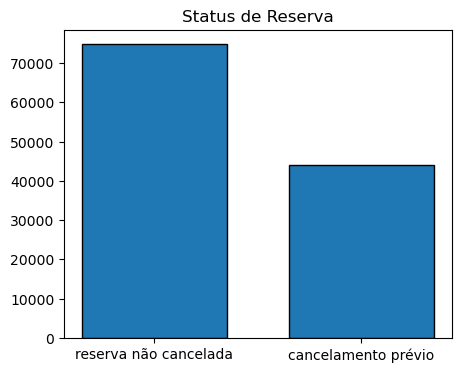

In [43]:
per_cancelamento= df['cancelamento'].value_counts(normalize= True)
print(per_cancelamento)

plt.figure(figsize= (5,4))
plt.title('Status de Reserva')
plt.bar(['reserva não cancelada', 'cancelamento prévio'], df['cancelamento'].value_counts(), edgecolor = 'k', width= 0.7)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

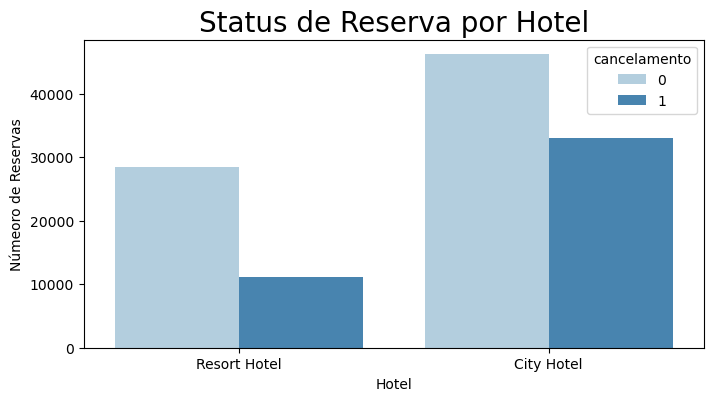

In [46]:
plt.figure(figsize= (8,4))
ax1= sns.countplot(data= df, x= 'hotel', hue= 'cancelamento', palette= 'Blues')
legend_labels,_ = ax1.get_legend_handles_labels()
plt.title('Status de Reserva por Hotel', size= 20)
plt.xlabel('Hotel')
plt.ylabel('Númeoro de Reservas')
plt.show

In [47]:
resort_hotel = df[df['hotel']== 'Resort Hotel']
resort_hotel['cancelamento'].value_counts(normalize= True)

0    0.72025
1    0.27975
Name: cancelamento, dtype: float64

In [48]:
city_hotel = df[df['hotel']== 'City Hotel']
city_hotel['cancelamento'].value_counts(normalize= True)

0    0.582918
1    0.417082
Name: cancelamento, dtype: float64

In [51]:
resort_hotel = resort_hotel.groupby('data de status da reserva')[['adr']].mean()
city_hotel = city_hotel.groupby('data de status da reserva')[['adr']].mean()

<function matplotlib.pyplot.show(close=None, block=None)>

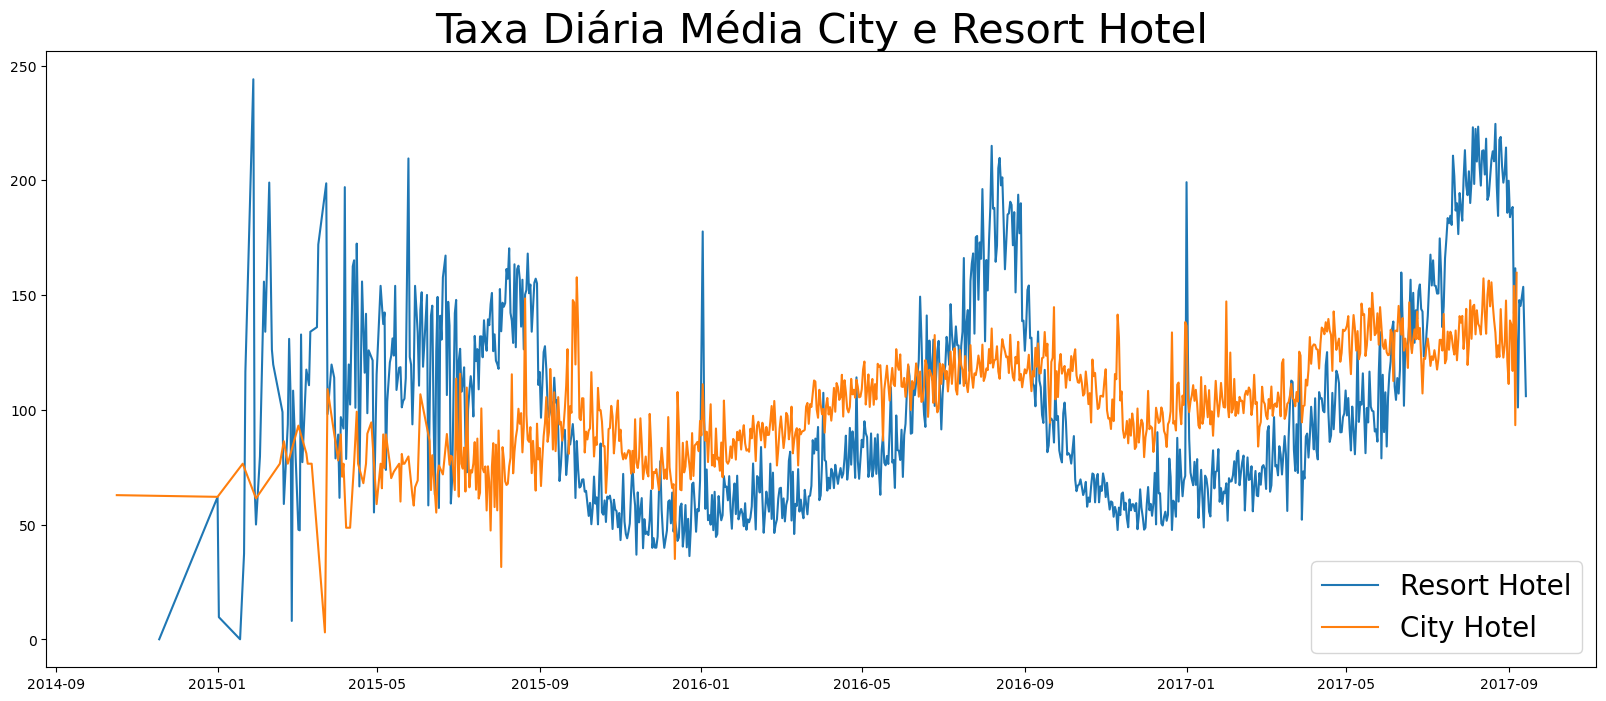

In [54]:
plt.figure(figsize= (20,8))
plt.title('Taxa Diária Média City e Resort Hotel', fontsize= 30)
plt.plot(resort_hotel.index, resort_hotel['adr'], label= "Resort Hotel")
plt.plot(city_hotel.index, city_hotel['adr'], label= "City Hotel")
plt.legend(fontsize= 20)
plt.show

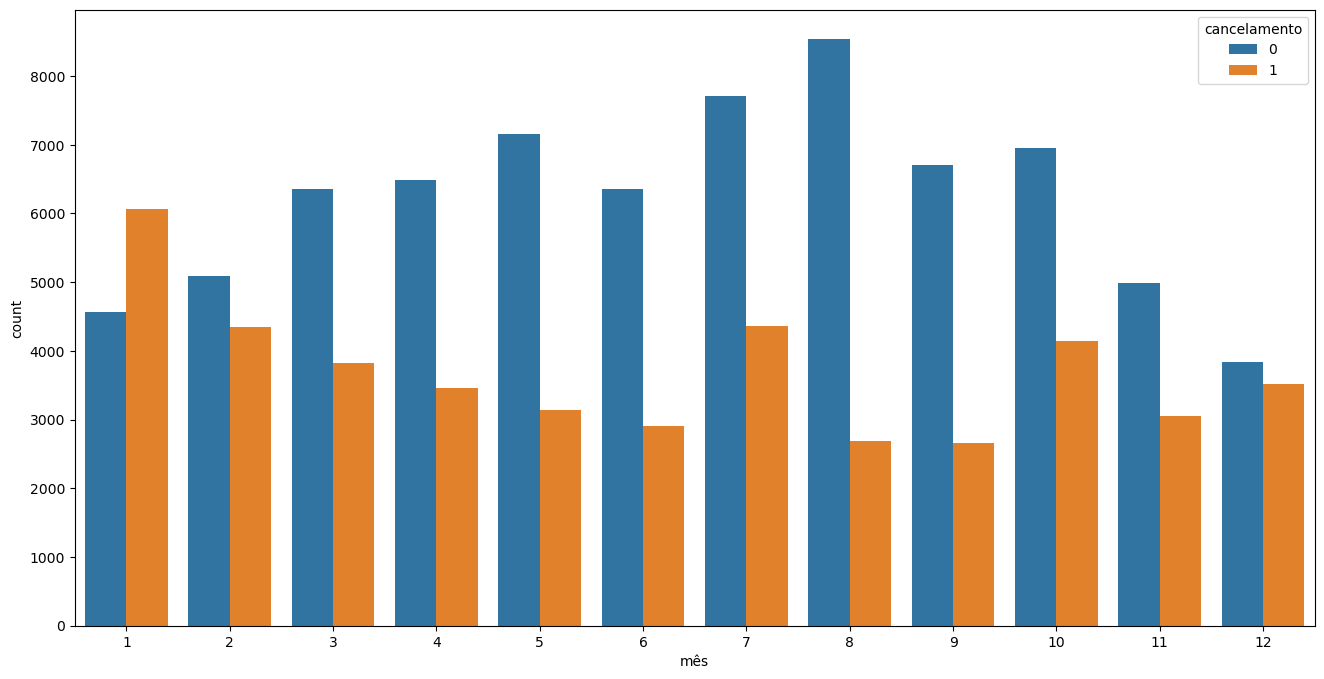

In [60]:
df['mês'] = df['data de status da reserva'].dt.month
plt.figure(figsize= (16,8))
ax1 = sns.countplot(x = 'mês', hue = 'cancelamento', data = df)

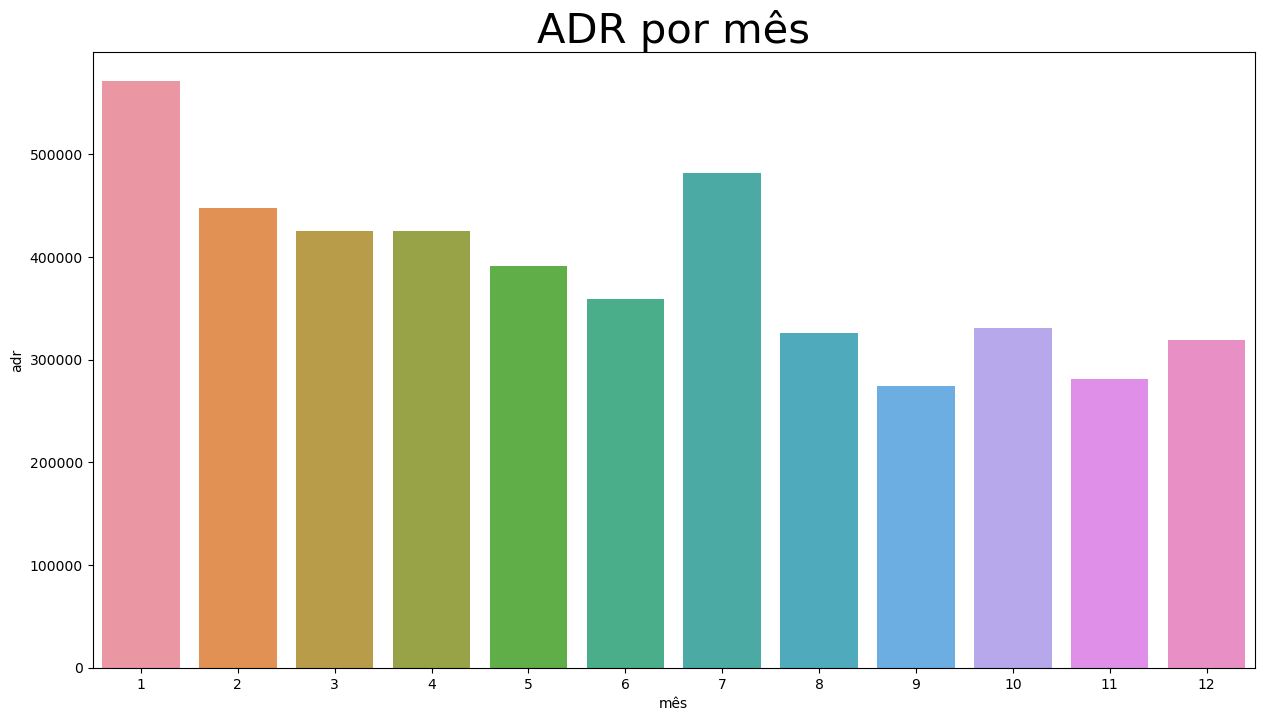

In [75]:
plt.figure(figsize = (15,8))
plt.title('ADR por mês', fontsize = 30)
plot = sns.barplot('mês', 'adr', data = df[df['cancelamento']==1].groupby('mês')[['adr']].sum().reset_index())

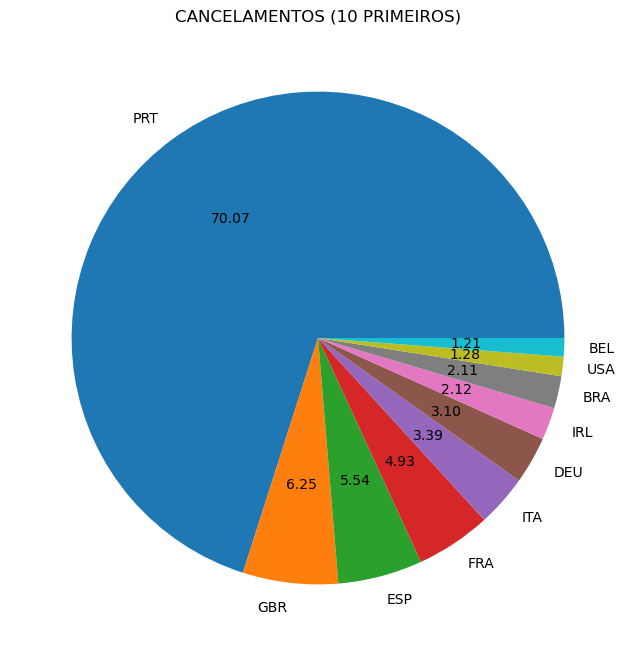

In [78]:
cancelled_data = df[df['cancelamento']== 1]
top_10_paises = cancelled_data['país'].value_counts()[:10]
plt.figure(figsize= (8,8))
plt.title('CANCELAMENTOS (10 PRIMEIROS)')
plt.pie(top_10_paises, autopct = '%.2f', labels = top_10_paises.index)
plt.show()

In [76]:
df['segmento'].value_counts()

Online TA        56402
Offline TA/TO    24159
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: segmento, dtype: int64

In [77]:
df['segmento'].value_counts(normalize = True)

Online TA        0.474377
Offline TA/TO    0.203193
Groups           0.166581
Direct           0.104696
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: segmento, dtype: float64

In [79]:
cancelled_data['segmento'].value_counts(normalize = True)

Online TA        0.469696
Groups           0.273985
Offline TA/TO    0.187466
Direct           0.043486
Corporate        0.022151
Complementary    0.002038
Aviation         0.001178
Name: segmento, dtype: float64

In [85]:
cancelled_df_adr = cancelled_data.groupby('data de status da reserva')[['adr']].mean()
cancelled_df_adr.reset_index(inplace= True)
cancelled_df_adr.sort_values('data de status da reserva', inplace= True)
cancelled_df_adr

,data de status da reserva,adr
0,2014-10-17,62.800000
1,2014-11-18,0.000000
2,2015-01-01,62.062779
3,2015-01-02,9.633750
4,2015-01-18,0.000000
...,...,...
897,2017-08-26,178.200000
898,2017-08-27,167.300000
899,2017-08-28,81.416667
900,2017-08-29,144.253333


In [91]:
not_cancelled_data = df[df['cancelamento']== 0]
not_cancelled_df_adr = not_cancelled_data.groupby('data de status da reserva')[['adr']].mean()
not_cancelled_df_adr.reset_index(inplace= True)
not_cancelled_df_adr.sort_values('data de status da reserva', inplace= True)
not_cancelled_df_adr

,data de status da reserva,adr
0,2015-07-01,31.650000
1,2015-07-02,95.924000
2,2015-07-03,97.645205
3,2015-07-04,110.480000
4,2015-07-05,100.308485
...,...,...
800,2017-09-08,101.012500
801,2017-09-09,147.778333
802,2017-09-10,145.272500
803,2017-09-12,153.570000


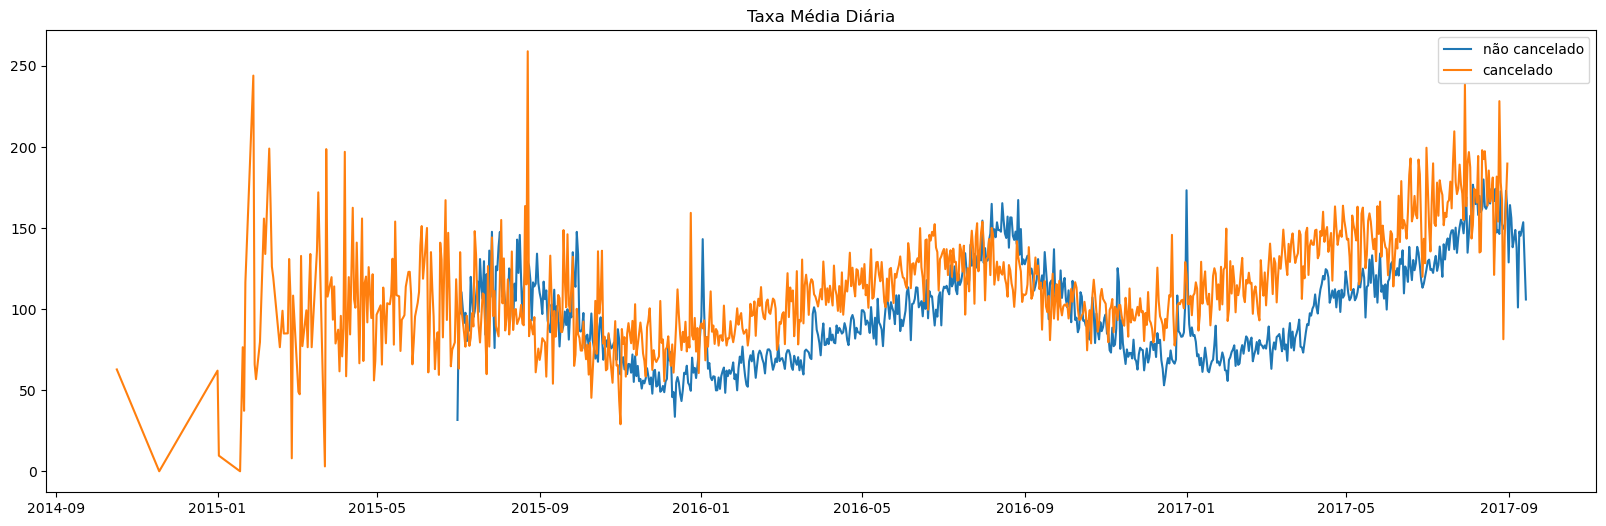

In [87]:
plt.figure(figsize =(20,6))
plt.title('Taxa Média Diária')
plt.plot(not_cancelled_df_adr['data de status da reserva'],not_cancelled_df_adr['adr'], label= 'não cancelado')
plt.plot(cancelled_df_adr['data de status da reserva'],cancelled_df_adr['adr'], label= 'cancelado')
plt.legend()